In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
train = pd.read_csv('C:/Stats Consulting/train_final.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 82 columns):
user_id                                     260864 non-null int64
seller_id                                   260864 non-null int64
label                                       260864 non-null int64
user_gender_female                          260864 non-null int64
user_gender_male                            260864 non-null int64
user_gender_unknown                         260864 non-null int64
user_age_0_18                               260864 non-null float64
user_age_18_24                              260864 non-null float64
user_age_25_29                              260864 non-null float64
user_age_30_34                              260864 non-null float64
user_age_35_39                              260864 non-null float64
user_age_40_49                              260864 non-null float64
user_age_50_                                260864 non-null float64
user_age_unknown 

In [3]:
test = pd.read_csv('C:/Stats Consulting/test_final.csv')
test.head()

,user_id,seller_id,user_gender_female,user_gender_male,user_gender_unknown,user_age_0_18,user_age_18_24,user_age_25_29,user_age_30_34,user_age_35_39,...,user_seller_add_to_favorite_cnt_db11_mth,user_seller_click_rt_db11,user_seller_purchase_rt_db11,user_seller_add_to_favorite_rt_db11,user_seller_click_rt_db11_wk,user_seller_purchase_rt_db11_wk,user_seller_add_to_favorite_rt_db11_wk,user_seller_click_rt_db11_mth,user_seller_purchase_rt_db11_mth,user_seller_add_to_favorite_rt_db11_mth
0,163968,4605,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,360576,1581,0,0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,1.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98688,1964,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98688,3645,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,295296,3361,0,1,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#class label imbalance
neg, pos = np.bincount(train['label'])
total = neg+pos
print('Total:{}\n'
      'Positive:{}({:2f}% of total)\n'.format(total, pos, 100*pos/total))

Total:260864
Positive:15952(6.115064% of total)



In [5]:
#fill all infinite entry with 0
train = train.replace(np.inf, 0)
test = test.replace(np.inf, 0)


# In[5]:


#data split (training_set, testing_set)
data_output = train.label
data_input = train.drop('label',axis=1)
data_input = data_input.drop('user_id', axis=1)
data_input = data_input.drop('seller_id', axis=1)


In [6]:
training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(data_input, data_output, test_size=0.3, random_state=1)

In [7]:
train_x = training_set_x.values
train_y = training_set_y.values
test_x = testing_set_x.values
test_y = testing_set_y.values

#form labels
bool_label = train_y != 0

In [8]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

In [9]:
train_x

array([[-1.44960113,  1.59585142, -0.2054283 , ..., -0.13000584,
        -0.0563    , -0.03821364],
       [ 0.68984494, -0.62662475, -0.2054283 , ..., -0.13000584,
        -0.0563    , -0.03821364],
       [ 0.68984494, -0.62662475, -0.2054283 , ..., -0.13000584,
        -0.0563    , -0.03821364],
       ...,
       [ 0.68984494, -0.62662475, -0.2054283 , ..., -0.13000584,
        -0.0563    , -0.03821364],
       [ 0.68984494, -0.62662475, -0.2054283 , ..., -0.13000584,
        -0.0563    , -0.03821364],
       [ 0.68984494, -0.62662475, -0.2054283 , ..., -0.13000584,
        -0.0563    , -0.03821364]])

In [10]:
pos_df = pd.DataFrame(train_x[ bool_label], columns = training_set_x.columns)
neg_df = pd.DataFrame(train_x[~bool_label], columns = training_set_x.columns)

Text(0.5, 0.98, 'Negative Distribution')

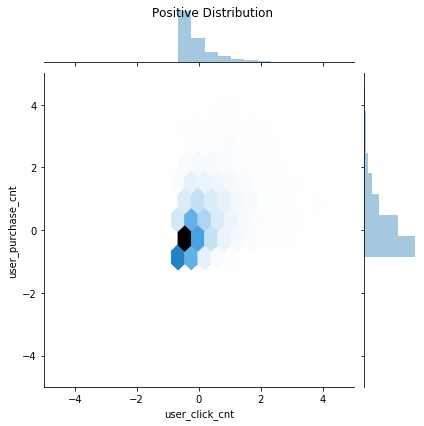

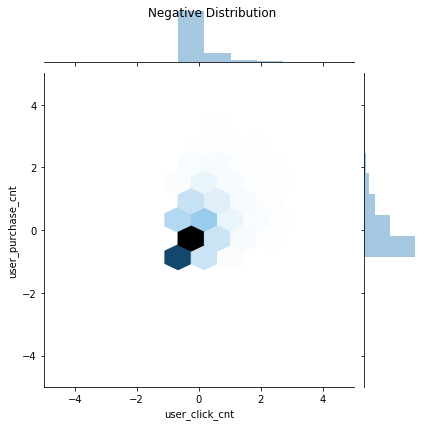

In [11]:
sns.jointplot(pos_df['user_click_cnt'], pos_df['user_purchase_cnt'], xlim=(-5,5), ylim=(-5,5), kind = 'hex')
plt.suptitle('Positive Distribution')

sns.jointplot(neg_df['user_click_cnt'], neg_df['user_purchase_cnt'], xlim=(-5,5), ylim=(-5,5), kind= 'hex')
plt.suptitle('Negative Distribution')

In [12]:
Metrics = [keras.metrics.BinaryAccuracy(name='accuracy'),
           keras.metrics.Precision(name='precision'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.AUC(name='auc')]

In [13]:
def model_build(metrics=Metrics, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([keras.layers.Dense(75, activation='relu', input_shape= (train_x.shape[-1],)),
                             keras.layers.Dropout(0.5),
                             keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),])
    model.compile(optimizer= keras.optimizers.Adam(lr=1e-3),
                 loss= keras.losses.BinaryCrossentropy(),
                  metrics = metrics)
    
    return model


In [14]:
EPOCHS = 100
BATCH_SIZE = 10

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                 verbose=1,
                                                 patience=10,
                                                 mode='max',
                                                 restore_best_weights=True)

model_initial = model_build()
model_initial.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 75)                6000      
_________________________________________________________________
dropout (Dropout)            (None, 75)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 76        
Total params: 6,076
Trainable params: 6,076
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_initial.predict(train_x)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0.77674675],
       [0.81066644],
       [0.731188  ],
       ...,
       [0.79048353],
       [0.6979237 ],
       [0.91517466]], dtype=float32)

In [16]:
results = model_initial.evaluate(train_x, train_y, batch_size = BATCH_SIZE, verbose=0)
print('Loss:{:0.4f}'.format(results[0]))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Loss:1.4077


In [17]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.73131475])

In [18]:
model_fix_bias = model_build(output_bias = initial_bias)
model_fix_bias.predict(train_x)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0.06537026],
       [0.04505759],
       [0.12724471],
       ...,
       [0.08088318],
       [0.03452551],
       [0.0430375 ]], dtype=float32)

In [19]:
results = model_fix_bias.evaluate(train_x, train_y, batch_size=BATCH_SIZE, verbose=0)
print('Loss: {:0.4f}'.format(results[0]))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Loss: 0.2593


In [20]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model_fix_bias.save_weights(initial_weights)
encoder = LabelEncoder()
encoder.fit(train_y)
encoded_Y = encoder.transform(train_y)
encoder.fit(test_y)
encoded_Y2 = encoder.transform(test_y)

In [21]:
model_zero_bias = model_build()
model_zero_bias.load_weights(initial_weights)
model_zero_bias.layers[-1].bias.assign([0.0])
with tf.device('cpu:0'):
    zero_bias_history = model_zero_bias.fit(train_x, encoded_Y, batch_size = BATCH_SIZE, epochs=20, validation_data=(test_x, encoded_Y2), verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [22]:
model_bias = model_build()
model_bias.load_weights(initial_weights)
with tf.device('cpu:0'):
    careful_bias = model_bias.fit(train_x, encoded_Y, batch_size = BATCH_SIZE, epochs=20, validation_data=(test_x, encoded_Y2), verbose=0)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [23]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [24]:
def plot_loss(history, label, n):
    plt.semilogy(history.epoch, history.history['loss'],
                 color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch, history.history['val_loss'],
                 color=colors[n], label='Val '+label, linestyle='--')
    plt.xlabel('Epoch Count')
    plt.ylabel('Loss')
    
    plt.legend()


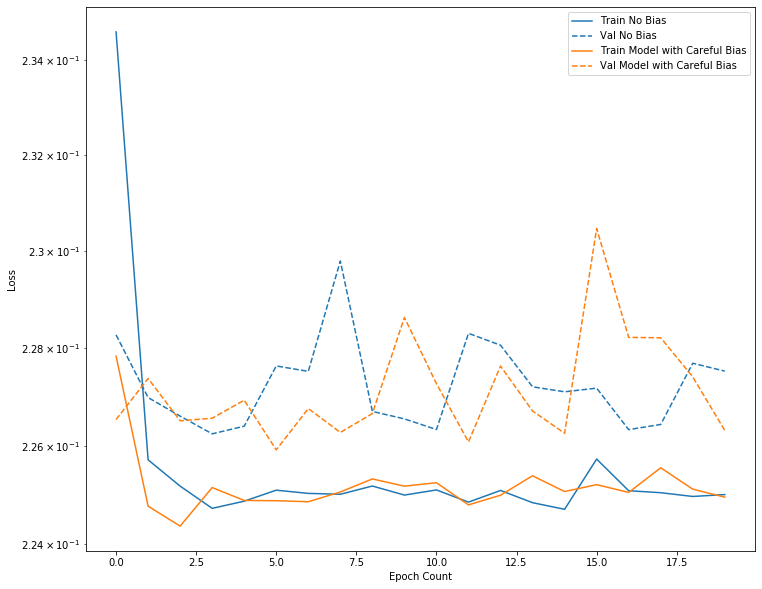

In [25]:
plot_loss(zero_bias_history, 'No Bias', 0)
plot_loss(careful_bias, 'Model with Careful Bias', 1)

In [26]:
#model training
model = model_build()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
baseline_history = model.fit(
    train_x,
    encoded_Y,
    batch_size=BATCH_SIZE, 
    epochs=EPOCHS, 
    validation_data=(test_x, encoded_Y2))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
18239/18261 [============================>.] - ETA: 0s - loss: 0.2522 - accuracy: 0.9372 - precision: 0.1318 - recall: 0.0034 - auc: 0.6019WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001B17F43D708> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the ve

In [27]:
def plot_metrics(history):
    metrics= ['loss','auc','precision','recall']
    for n, metric in enumerate(metrics):
        name = metric.replace('_',' ').capitalize()
        plt.subplot(2, 2, n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train Data')
        plt.plot(history.epoch, history.history['val_'+metric], color=colors[0], linestyle='--', label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric=='loss':
            plt.ylim([0.2, 0.25])
        elif metric=='auc':
            plt.ylim([0.6, 0.7])
        elif metric=='recall':
            plt.ylim([0, 0.02])
        else:
            plt.ylim([0,1])
        
        plt.legend()

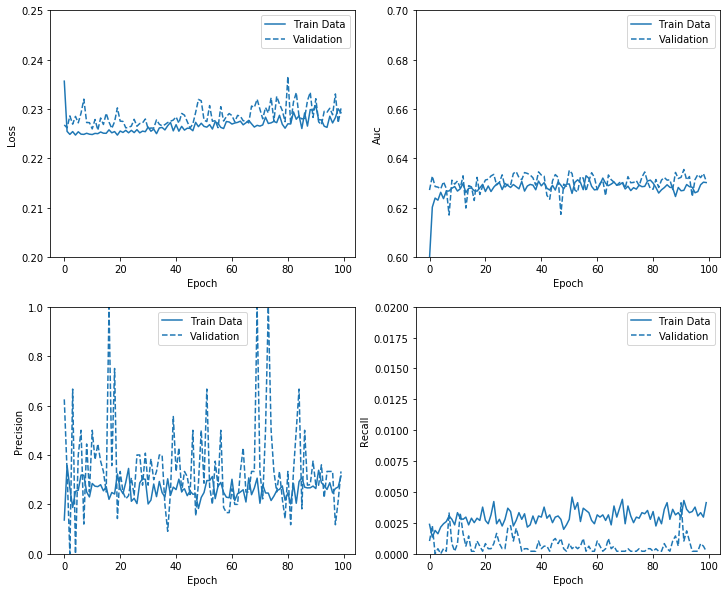

In [28]:
plot_metrics(baseline_history)

In [29]:
train_pred_baseline = model.predict(train_x, batch_size=BATCH_SIZE)
test_pred_baseline = model.predict(test_x, batch_size=BATCH_SIZE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [30]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    print('True Non-Repeat customers Detected (True Negatives): ', cm[0][0])
    print('Non-repeat customers Incorrectly Detected (False Positives): ', cm[0][1])
    print('repeat customers Missed (False Negatives): ', cm[1][0])
    print('repeat customers Detected (True Positives): ', cm[1][1])
    print('Total repeat customers ', np.sum(cm[1]))

loss :  0.2301310896873474
accuracy :  0.9381037354469299
precision :  0.3333333432674408
recall :  0.00020648358622565866
auc :  0.6308318376541138

True Non-Repeat customers Detected (True Negatives):  73415
Non-repeat customers Incorrectly Detected (False Positives):  2
repeat customers Missed (False Negatives):  4842
repeat customers Detected (True Positives):  1
Total repeat customers  4843


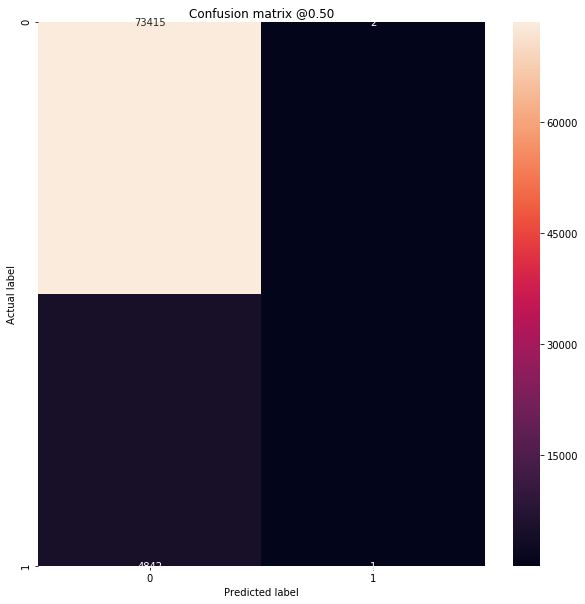

In [31]:
baseline_results = model.evaluate(test_x, encoded_Y2, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(encoded_Y2, test_pred_baseline)

In [32]:
#Oversampling with smote
sm = SMOTE()
training_x_sm, training_y_sm = sm.fit_sample(training_set_x, training_set_y)
train_x_sm = training_x_sm.values
train_y_sm = training_y_sm.values
test_x = testing_set_x.values
test_y = testing_set_y.values
scaler = StandardScaler()
train_x_sm = scaler.fit_transform(train_x_sm)
test_x = scaler.fit_transform(test_x)
encoder = LabelEncoder()
encoder.fit(train_y_sm)
encoded_Y_sm = encoder.transform(train_y_sm)
encoder.fit(test_y)
encoded_Y2_sm = encoder.transform(test_y)

In [33]:
train_x_sm

array([[-1.24981436,  2.05082643, -0.15238616, ..., -0.15585978,
        -0.07199793, -0.03626891],
       [ 0.80011882, -0.48760831, -0.15238616, ..., -0.15585978,
        -0.07199793, -0.03626891],
       [ 0.80011882, -0.48760831, -0.15238616, ..., -0.15585978,
        -0.07199793, -0.03626891],
       ...,
       [ 0.80011882, -0.48760831, -0.15238616, ..., -0.15585978,
        -0.07199793, -0.03626891],
       [-1.24981436, -0.48760831, -0.15238616, ..., -0.15585978,
        -0.07199793, -0.03626891],
       [-1.24981436, -0.48760831, -0.15238616, ..., -0.15585978,
        -0.07199793, -0.03626891]])

In [34]:
train_y_sm

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [35]:
test_x

array([[-1.43544356,  1.58555568, -0.20981773, ..., -0.13225158,
        -0.0583933 , -0.03884208],
       [ 0.69664878, -0.63069372, -0.20981773, ..., -0.13225158,
        -0.0583933 , -0.03884208],
       [ 0.69664878, -0.63069372, -0.20981773, ..., -0.13225158,
        -0.0583933 , -0.03884208],
       ...,
       [ 0.69664878, -0.63069372, -0.20981773, ..., -0.13225158,
        -0.0583933 , -0.03884208],
       [ 0.69664878, -0.63069372, -0.20981773, ..., -0.13225158,
        -0.0583933 , -0.03884208],
       [ 0.69664878, -0.63069372, -0.20981773, ..., -0.13225158,
        -0.0583933 , -0.03884208]])

In [36]:
train_y_sm.mean()

0.5

In [37]:
train_y_sm.sum()

171495

In [38]:
resample_steps_per_epoch = np.ceil((2.0*171495)/10)

In [39]:
resample_steps_per_epoch

34299.0

In [45]:
resample_model = model_build()
resample_model.load_weights(initial_weights)

output_layer = resample_model.layers[-1]
output_layer.bias.assign([0])

resample_history = resample_model.fit(
    train_x_sm,
    encoded_Y_sm,
    batch_size=BATCH_SIZE, 
    epochs=EPOCHS,
    validation_data=(test_x, encoded_Y2_sm))


Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
34269/34299 [============================>.] - ETA: 0s - loss: 0.4843 - accuracy: 0.8261 - precision: 0.8630 - recall: 0.7748 - auc: 0.9020WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001B1B3480798> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the ve

In [46]:
def plot_metrics(history):
    metrics= ['loss','auc','precision','recall']
    for n, metric in enumerate(metrics):
        name = metric.replace('_',' ').capitalize()
        plt.subplot(2, 2, n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train Data')
        plt.plot(history.epoch, history.history['val_'+metric], color=colors[0], linestyle='--', label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric=='loss':
            plt.ylim([0, 1])
        elif metric=='auc':
            plt.ylim([0.4, 1])
        elif metric=='recall':
            plt.ylim([0,1])
        else:
            plt.ylim([0,1])
        
        plt.legend()

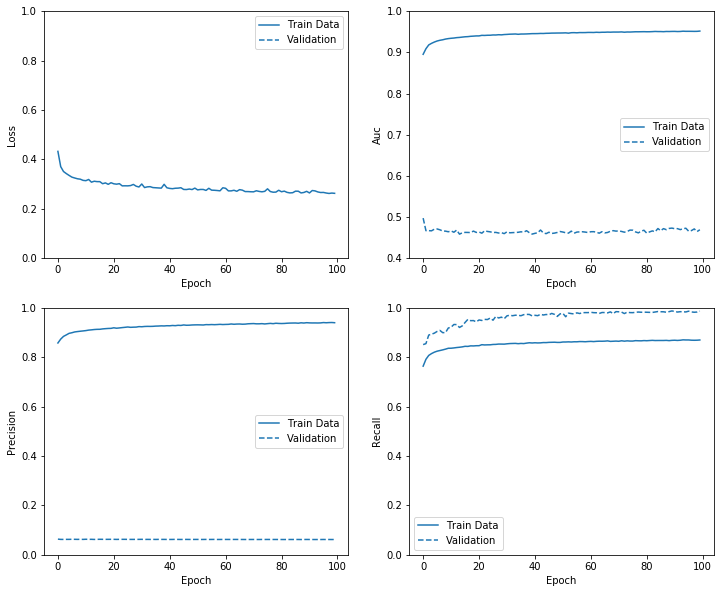

In [47]:
plot_metrics(resample_history)

In [48]:
resample_model = model_build()
resample_model.load_weights(initial_weights)

output_layer = resample_model.layers[-1]
output_layer.bias.assign([0])

resample_history = resample_model.fit(
    train_x_sm,
    encoded_Y_sm,
    epochs=EPOCHS, 
    validation_data=(test_x, encoded_Y2_sm))


Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10696/10719 [============================>.] - ETA: 0s - loss: 0.5077 - accuracy: 0.4940 - precision: 0.3880 - recall: 0.7167 - auc: 0.4954WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001B1B3480048> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the ve

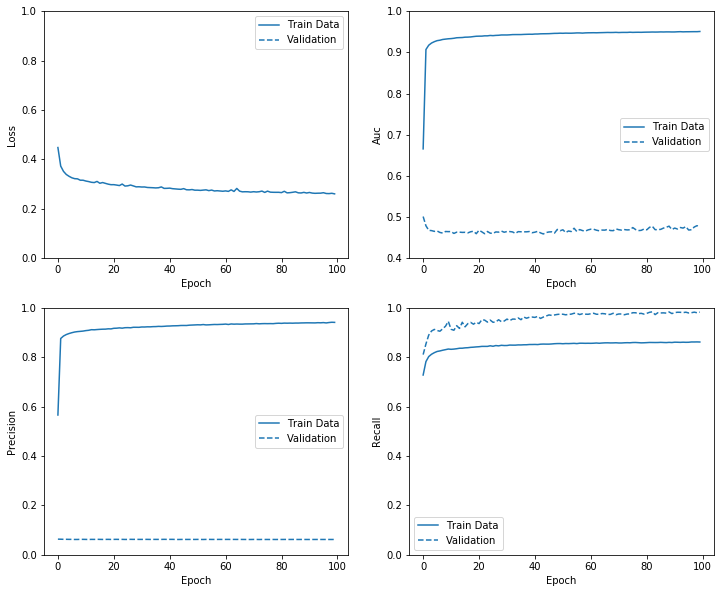

In [49]:
plot_metrics(resample_history)

In [50]:
train_prediction_resample = resample_model.predict(train_x, batch_size=BATCH_SIZE)
test_prediction_resample = resample_model.predict(test_x, batch_size=BATCH_SIZE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


loss : 14.868261337280273
accuracy : 0.08061589300632477
precision : 0.06208399683237076
recall : 0.9822424054145813
auc : 0.4755801260471344

True Non-Repeat customers Detected (True Negatives):  1552
Non-repeat customers Incorrectly Detected (False Positives):  71865
repeat customers Missed (False Negatives):  86
repeat customers Detected (True Positives):  4757
Total repeat customers  4843


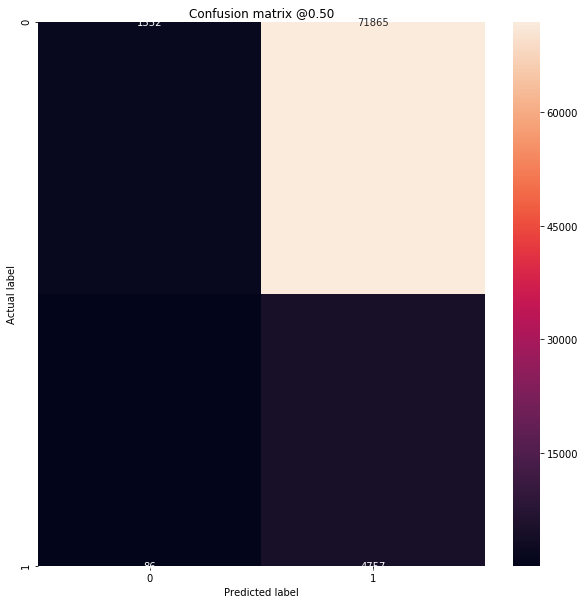

In [51]:
resampled_results = resample_model.evaluate(test_x, test_y, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resample_model.metrics_names, resampled_results):
    print(name, ':', value)
print()

plot_cm(test_y, test_prediction_resample)

In [52]:
test_prediction_resample

array([[1.        ],
       [1.        ],
       [0.9970393 ],
       ...,
       [0.40775195],
       [0.99400914],
       [0.95589936]], dtype=float32)

In [53]:
test

,user_id,seller_id,user_gender_female,user_gender_male,user_gender_unknown,user_age_0_18,user_age_18_24,user_age_25_29,user_age_30_34,user_age_35_39,...,user_seller_add_to_favorite_cnt_db11_mth,user_seller_click_rt_db11,user_seller_purchase_rt_db11,user_seller_add_to_favorite_rt_db11,user_seller_click_rt_db11_wk,user_seller_purchase_rt_db11_wk,user_seller_add_to_favorite_rt_db11_wk,user_seller_click_rt_db11_mth,user_seller_purchase_rt_db11_mth,user_seller_add_to_favorite_rt_db11_mth
0,163968,4605,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,360576,1581,0,0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,1.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98688,1964,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98688,3645,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,295296,3361,0,1,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261472,228479,3111,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261473,97919,2341,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261474,97919,3971,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261475,32639,3536,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
test_x_id = test[['user_id','seller_id']]
test_x = test.drop(['user_id','seller_id'], axis=1)
test_x_id.head()

,user_id,seller_id
0,163968,4605
1,360576,1581
2,98688,1964
3,98688,3645
4,295296,3361


In [55]:
test_x.head()

,user_gender_female,user_gender_male,user_gender_unknown,user_age_0_18,user_age_18_24,user_age_25_29,user_age_30_34,user_age_35_39,user_age_40_49,user_age_50_,...,user_seller_add_to_favorite_cnt_db11_mth,user_seller_click_rt_db11,user_seller_purchase_rt_db11,user_seller_add_to_favorite_rt_db11,user_seller_click_rt_db11_wk,user_seller_purchase_rt_db11_wk,user_seller_add_to_favorite_rt_db11_wk,user_seller_click_rt_db11_mth,user_seller_purchase_rt_db11_mth,user_seller_add_to_favorite_rt_db11_mth
0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
test_x = test_x.values
scaler = StandardScaler()
test_x = scaler.fit_transform(test_x)

In [57]:
final_prediction = resample_model.predict(test_x, batch_size=BATCH_SIZE)
final_prediction

array([[0.99999976],
       [1.        ],
       [1.        ],
       ...,
       [0.99999833],
       [0.9999975 ],
       [0.8249663 ]], dtype=float32)

In [58]:
final_submission = pd.DataFrame(final_prediction, columns=['Prob'])
final_output_dl = pd.concat([test_x_id.reset_index(drop=True), final_submission.reset_index(drop=True)], axis=1)

In [59]:
final_output_dl.head()

,user_id,seller_id,Prob
0,163968,4605,1.000000
1,360576,1581,1.000000
2,98688,1964,1.000000
3,98688,3645,1.000000
4,295296,3361,0.994469


In [60]:
final_output_dl.to_csv('C:/Stats Consulting/final_submission_dl.csv', index=False)